# Modeling and simulating the diffusion of influenza at micro and macro level
In this project we studied the diffusion of Influenza virus at micro and macro levels. The micro diffusion dynamics were modeled using data from British Medical Journal, 4 March 1978. This data shows the spread of influenza in the boarding school that has 763 students. Susceptible-Infected-Removed (SIR) model was used to simulate the spread of infection over random and scale-free networks. Random and strategic immunization and quarantization of students (nodes) was simulated in scale-free networks. 

Airline-network data was downloaded from http://openflights.org/ and analyzed using network models. This data shows that airline network follows power-law degree distribution and therefore properties of scale-free networks can be used to strategically screen and quarantine people in this network to effectively control and contain the spred of epidemics.

In [125]:
# Date: 04/20/2018
# Author: Jag Gill
# importing packages
import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


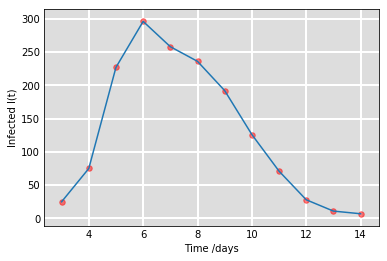

In [126]:
# modeling boarding school data from influenza outbreak
# in a british boarding school 
# British Medical Journal, 4 March 1978
# Date: 04/20/2018
# Author: Jag Gill

daysList = list(range(3, 15))
print(daysList)
numInfected = [25, 75, 227, 296, 258, 236, 192, 126, 71, 28, 11, 7]

#G = nx.read_gml('test.gml')


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
#ax.plot.scatter(daysList, numInfected, s=30, alpha=0.5, marker='o', color='r')
ax.plot(daysList, numInfected)
ax.scatter(daysList, numInfected, s=30, alpha=0.5, marker='o', color='r')
ax.set_xlabel('Time /days')
ax.set_ylabel('Infected I(t)')
#ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.show()

Text(0.5,1,'log-log scale')

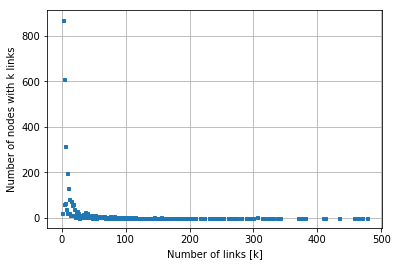

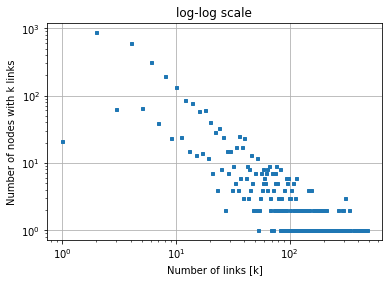

In [127]:
# Plotting degree distribution graphs of airline network

df = pd.read_csv('C:\\Users\\sgill\\Documents\\SOIC\\SOICProject\\Project\\AirNodecountDegree.csv')
ax = df.plot(x='Degree', y='Count', style='s', grid=True, markersize=3, legend=False )
ax.set_xlabel("Number of links [k]")
ax.set_ylabel("Number of nodes with k links")

ax2 = df.plot(x='Degree', y='Count', style='s', grid=True, markersize=3, legend=False )
ax2.set_xlabel("Number of links [k]")
ax2.set_ylabel("Number of nodes with k links")
ax2.set_xscale("log", nonposx='clip')
ax2.set_yscale("log", nonposy='clip')
ax2.set_title('log-log scale')

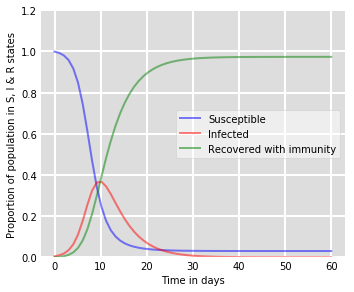

In [128]:
# Network Science - Final Project
# SIR Model to study influenza virus outbreaks 
# The code for the SIR model was adapted from:
# https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
# Date: 04/20/2018
# Author: Jag Gill

# importing the scipy.integrate odeint package to use solve differential equations for SIR model
from scipy.integrate import odeint


# Total population represented by N
N = 763

# Initial number of infected individuals = I0 and recovered individuals = R0
I0 = N * 0.005
R0  = 0

# Nodes susceptible to infection are represented by S0
S0 = N - I0 - R0

# Setting beta value 0.3 and gamma value 0.25 
beta = 0.9
gamma = 0.25

# A grid of time points in days, 60 days were used for this experiment
t = np.linspace(0, 60, 60)

# The SIR model differential equations
def SIR_Model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I )/ N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid t 
ret = odeint(SIR_Model, y0, t, args=(N, beta, gamma))

# Assigning different values of SIR based on different values of beta
S, I, R = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(12, 10))

ax1 = fig.add_subplot(221, facecolor='#dddddd', axisbelow=True)
ax1.plot(t, S/760, 'b', alpha=0.5, lw=2, label='Susceptible')
ax1.plot(t, I/760, 'r', alpha=0.5, lw=2, label='Infected')
ax1.plot(t, R/760, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Proportion of population in S, I & R states')
ax1.set_ylim(0,1.2)
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax1.legend(loc="center right")
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax1.spines[spine].set_visible(False)

plt.show()

In [129]:
# There will be 4 parameters for the model:
# (graph) The networkx graph 
# (tmax) The maximum time that we will run the model 
# (beta) The transmission probability 
# (initial_inf) The initial fraction of infected nodes
def SI(graph, tmax, beta, initial_inf):
    
    # First lets generate a set of initially infected nodes.
    # We can do this by having numpy's random choice function pick 
    # nodes from the graph at random without replacement
    # I convert the resulting list to a set so that it 
    # is faster to search over in the next step
    inf_o = set(np.random.choice(graph.nodes(), size=int(len(graph) * initial_inf), replace=False))
    
    # Next we need to create an attribute for the nodes
    # which will designate the state of that node as either infected 
    # or susceptible. We can use networkx's set attribute function to do this.
    
    # There is another issue though. I plan on iterating through each node
    # in order to update its state based on the states of other nodes in the
    # network. If I change the node state, then the next node will
    # be updating with respect to a network that is now in a different state!
    
    # When modelling discrete time systems there are generally two different
    # update strategies used. Synchronous and asynchronous updating. In
    # Asynchronous updating random nodes are picked and their states are 
    # updated according to the current network state.
    # In synchronous updating, there is a global time clock that all
    # nodes are synched to, so nodes only update according to the 
    # state of the network at the current time-step and all nodes
    # are updated simultaneously.
    
    # Choosing the updating scheme can have a huge impact on dynamics.
    # We will be using a synchronous updating scheme, which means we
    # need to store the current state of the system while we update. There are many
    # ways to accomplish this such as having a temporary state dictionary,
    # but because I want to make a time-series graph later, I will just
    # keep the whole network history belonging to each node in a list.
    
    # The code below uses a dictionary comprehension to generate a dictionary
    # with keys=nodes and values=a list of 0's and 1's. The 1 is for infected
    # and 0 is for susceptible. We then give that dictionary to networkx's
    # attribute function which then gives all the nodes the 'inf' attribute.
    
    # I also put a conditional statement in the dictionary comprehension
    # which sets the initial states to 0 or 1 depending upon whether
    # it is in the inf_o set. This all sets up our graph for t=0:
    
    # If you ues networkx 1.9-, this line should be:
#     nx.set_node_attributes(graph,'inf', {node: ([1] if node in inf_o else [0]) for node in graph.nodes()})

    nx.set_node_attributes(graph, {node: ([1] if node in inf_o else [0]) for node in graph.nodes()},'inf')
    
    # Now we need to loop through for each time step
    for t in range(tmax):
        
        # For each time step we need to update all the nodes in the network 
        for node in graph.nodes():
            
            # Now we check if the node if susceptible to infection
            # If it is, we need to determine the probability of it switching
            # and then switch it for the next time-step
            if graph.node[node]['inf'][t] == 0:
                
                # First determine how many infected neighbors the node has at time t:
                num_inf_neighbors = np.sum([ graph.node[neighbor]['inf'][t] for neighbor in graph.neighbors(node)])
                
                # Instead of drawing a bunch of random numbers for each neighbor
                # we  can just calculate the cumulative probability of getting
                # infected since these events are independent and then just
                # draw 1 random number to check against:
                if np.random.random() < (1 - (1 - beta)**num_inf_neighbors):
                    # If infection occurs we add a 1 to the state list of the node.
                    # Note that by doing this we don't change how the other 
                    # nodes update, because they will be using time index t not t+1
                    graph.node[node]['inf'].append(1)
                    
                else:
                    # If no infection occurs, then just append the current state
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
                    
            # Similarly, if the node is already infected it can't change back
            # So we append the current state if it wasn't susceptible
            else:
                graph.node[node]['inf'].append(graph.node[node]['inf'][t])
                
    # Once the updates have run their course for all nodes up to tmax we can
    # return the time-series of the fraction of infected nodes
    # It is easy to calculate because I let infected be 1, so the 
    # fraction infected is just the mean of the population at time t:
    
    #print([ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)])
    return [ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)]

In [130]:
# There will be 5 parameters for the model:
# (graph) The networkx graph 
# (tmax) The maximum time that we will run the model 
# (beta) The transmission probability 
# (initial_inf) The initial fraction of infected nodes
# (mu) The probability of reversion of infected nodes back to susceptible nodes
def SIS(graph, tmax, beta, initial_inf, mu):
    
    # First lets generate a set of initially infected nodes.
    # We can do this by having numpy's random choice function pick 
    # nodes from the graph at random without replacement
    # I convert the resulting list to a set so that it 
    # is faster to search over in the next step
    inf_o = set(np.random.choice(graph.nodes(), size=int(len(graph) * initial_inf), replace=False))
    
    # Next we need to create an attribute for the nodes
    # which will designate the state of that node as either infected 
    # or susceptible. We can use networkx's set attribute function to do this.
    
    # There is another issue though. I plan on iterating through each node
    # in order to update its state based on the states of other nodes in the
    # network. If I change the node state, then the next node will
    # be updating with respect to a network that is now in a different state!
    
    # When modelling discrete time systems there are generally two different
    # update strategies used. Synchronous and asynchronous updating. In
    # Asynchronous updating random nodes are picked and their states are 
    # updated according to the current network state.
    # In synchronous updating, there is a global time clock that all
    # nodes are synched to, so nodes only update according to the 
    # state of the network at the current time-step and all nodes
    # are updated simultaneously.
    
    # Choosing the updating scheme can have a huge impact on dynamics.
    # We will be using a synchronous updating scheme, which means we
    # need to store the current state of the system while we update. There are many
    # ways to accomplish this such as having a temporary state dictionary,
    # but because I want to make a time-series graph later, I will just
    # keep the whole network history belonging to each node in a list.
    
    # The code below uses a dictionary comprehension to generate a dictionary
    # with keys=nodes and values=a list of 0's and 1's. The 1 is for infected
    # and 0 is for susceptible. We then give that dictionary to networkx's
    # attribute function which then gives all the nodes the 'inf' attribute.
    
    # I also put a conditional statement in the dictionary comprehension
    # which sets the initial states to 0 or 1 depending upon whether
    # it is in the inf_o set. This all sets up our graph for t=0:
    
    # If you ues networkx 1.9-, this line should be:
#     nx.set_node_attributes(graph,'inf', {node: ([1] if node in inf_o else [0]) for node in graph.nodes()})

    nx.set_node_attributes(graph, {node: ([1] if node in inf_o else [0]) for node in graph.nodes()},'inf')
    
    # Now we need to loop through for each time step
    for t in range(tmax):
        
        # For each time step we need to update all the nodes in the network 
        for node in graph.nodes():
            
            # Now we check if the node if susceptible to infection
            # If it is, we need to determine the probability of it switching
            # and then switch it for the next time-step
            if graph.node[node]['inf'][t] == 0:
                
                # First determine how many infected neighbors the node has at time t:
                num_inf_neighbors = np.sum([ graph.node[neighbor]['inf'][t] for neighbor in graph.neighbors(node)])
                
                # Instead of drawing a bunch of random numbers for each neighbor
                # we  can just calculate the cumulative probability of getting
                # infected since these events are independent and then just
                # draw 1 random number to check against:
                if np.random.random() < (1 - (1 - beta)**num_inf_neighbors):
                    # If infection occurs we add a 1 to the state list of the node.
                    # Note that by doing this we don't change how the other 
                    # nodes update, because they will be using time index t not t+1
                    graph.node[node]['inf'].append(1)
                    
                else:
                    # If no infection occurs, then just append the current state
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
                    
            # If a node is already infected it can change back to susceptible state with probability mu
            else:
                # if the node is in infected state then convert it to susceptible state with probability mu
                if np.random.random() < mu:
                    # If a node is in infected state we convert it to susceptible state by appending 0
                    # Note that by doing this we don't change how the other 
                    # nodes update, because they will be using time index t not t+1
                    graph.node[node]['inf'].append(0)
                else:
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
   
    return [ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)]

In [131]:
# There will be 5 parameters for the model:
# (graph) The networkx graph 
# (tmax) The maximum time that we will run the model 
# (beta) The transmission probability 
# (initial_inf) The initial fraction of infected nodes
# (mu) The probability of reversion of infected nodes back to susceptible nodes
def SIR(graph, tmax, beta, initial_inf, gamma):
    
    # First lets generate a set of initially infected nodes.
    # We can do this by having numpy's random choice function pick 
    # nodes from the graph at random without replacement
    # I convert the resulting list to a set so that it 
    # is faster to search over in the next step
    inf_o = set(np.random.choice(graph.nodes(), size=int(len(graph) * initial_inf), replace=False))
    
    # Next we need to create an attribute for the nodes
    # which will designate the state of that node as either infected 
    # or susceptible. We can use networkx's set attribute function to do this.
    
    # There is another issue though. I plan on iterating through each node
    # in order to update its state based on the states of other nodes in the
    # network. If I change the node state, then the next node will
    # be updating with respect to a network that is now in a different state!
    
    # When modelling discrete time systems there are generally two different
    # update strategies used. Synchronous and asynchronous updating. In
    # Asynchronous updating random nodes are picked and their states are 
    # updated according to the current network state.
    # In synchronous updating, there is a global time clock that all
    # nodes are synched to, so nodes only update according to the 
    # state of the network at the current time-step and all nodes
    # are updated simultaneously.
    
    # Choosing the updating scheme can have a huge impact on dynamics.
    # We will be using a synchronous updating scheme, which means we
    # need to store the current state of the system while we update. There are many
    # ways to accomplish this such as having a temporary state dictionary,
    # but because I want to make a time-series graph later, I will just
    # keep the whole network history belonging to each node in a list.
    
    # The code below uses a dictionary comprehension to generate a dictionary
    # with keys=nodes and values=a list of 0's and 1's. The 1 is for infected
    # and 0 is for susceptible. We then give that dictionary to networkx's
    # attribute function which then gives all the nodes the 'inf' attribute.
    
    # I also put a conditional statement in the dictionary comprehension
    # which sets the initial states to 0 or 1 depending upon whether
    # it is in the inf_o set. This all sets up our graph for t=0:
    
    # If you ues networkx 1.9-, this line should be:
#     nx.set_node_attributes(graph,'inf', {node: ([1] if node in inf_o else [0]) for node in graph.nodes()})

    nx.set_node_attributes(graph, {node: ([1] if node in inf_o else [0]) for node in graph.nodes()},'inf')
    
    # Now we need to loop through for each time step
    for t in range(tmax):
        
        # For each time step we need to update all the nodes in the network 
        for node in graph.nodes():
            
            # Now we check if the node if susceptible to infection
            # If it is, we need to determine the probability of it switching
            # and then switch it for the next time-step
            if graph.node[node]['inf'][t] == 0:
                
                # First determine how many infected neighbors the node has at time t:
                num_inf_neighbors = np.sum([ graph.node[neighbor]['inf'][t] for neighbor in graph.neighbors(node)])
                
                # Instead of drawing a bunch of random numbers for each neighbor
                # we  can just calculate the cumulative probability of getting
                # infected since these events are independent and then just
                # draw 1 random number to check against:
                if np.random.random() < (1 - (1 - beta)**num_inf_neighbors):
                    # If infection occurs we add a 1 to the state list of the node.
                    # Note that by doing this we don't change how the other 
                    # nodes update, because they will be using time index t not t+1
                    graph.node[node]['inf'].append(1)
                    
                else:
                    # If no infection occurs, then just append the current state
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
                    
            # If a node is already infected it can change back to susceptible state with probability mu
            else:
                # if the node is in infected state then convert it to susceptible state with probability mu
                if np.random.random() < gamma:
                    # If a node is in infected state we convert it to susceptible state by appending 0
                    # Note that by doing this we don't change how the other 
                    # nodes update, because they will be using time index t not t+1
                    graph.node[node]['inf'].append(0.0001)
                else:
                    graph.node[node]['inf'].append(graph.node[node]['inf'][t])
   
    return [ np.mean([ graph.node[node]['inf'][t] for node in graph.nodes() ]) for t in range(tmax)]

And there we have our SIS model. The function is mostly comments, there are only a dozen lines of code involved in the whole process. Lets give it a run:

In [132]:
# Generating a random graph with similar nodes and edges as the scale-free graph below
rnd_graph = nx.erdos_renyi_graph(763, 0.005)

# We want to make sure that the graph is connected, so we will only take the largest
# connected component, as disconnected parts can't be infected or transmit infection:
rnd_graph = max(nx.connected_component_subgraphs(rnd_graph), key=len)
print(nx.info(rnd_graph))

Name: 
Type: Graph
Number of nodes: 734
Number of edges: 1456
Average degree:   3.9673


In [133]:
# Generating scale-free graph to simulate the spread of influenza in boarding school
sfg = nx.scale_free_graph(763, alpha=0.35, beta=0.60, gamma=0.05, delta_in=0.4, delta_out=0.4)
sfg_graph = nx.Graph(sfg)
print(type(sfg_graph).__name__)
print(nx.info(sfg_graph))

Graph
Name: 
Type: Graph
Number of nodes: 763
Number of edges: 1433
Average degree:   3.7562


In [134]:
# Creating a sorted list of nodes for scale-free network based on degree
# code adapted from https://stackoverflow.com/questions/48382575/sort-graph-nodes-according-to-their-degree
nodeList = sorted(sfg.degree, key=lambda x: x[1], reverse=True)
print(nodeList)

# Taking top 5 highest degree nodes from the scale-free network and storing in a list
list5 = [nodeList[i][0] for i in range(0, 5) ]
print(list5)

# Taking top 10 highest degree nodes from the scale-free network and storing in a list
list10 = [nodeList[i][0] for i in range(0, 10) ]
print(list10)

# Taking top 15 highest degree nodes from the scale-free network and storing in a list
list15 = [nodeList[i][0] for i in range(0, 15) ]
print(list15)

# Taking top 20 highest degree nodes from the scale-free network and storing in a list
list20 = [nodeList[i][0] for i in range(0, 20) ]
print(list20)

[(1, 513), (0, 498), (3, 184), (5, 103), (6, 69), (20, 66), (14, 58), (18, 47), (2, 41), (9, 36), (17, 36), (4, 34), (46, 29), (12, 27), (8, 26), (54, 26), (27, 24), (32, 24), (16, 22), (85, 22), (74, 21), (7, 20), (71, 19), (105, 19), (13, 18), (23, 18), (49, 18), (98, 18), (134, 18), (62, 16), (25, 15), (80, 14), (31, 13), (44, 13), (47, 13), (101, 13), (22, 12), (33, 12), (69, 12), (122, 12), (61, 11), (63, 11), (82, 11), (86, 11), (29, 10), (56, 10), (68, 10), (81, 10), (96, 10), (130, 10), (38, 9), (75, 9), (128, 9), (143, 9), (144, 9), (172, 9), (200, 9), (288, 9), (26, 8), (28, 8), (52, 8), (84, 8), (117, 8), (141, 8), (148, 8), (153, 8), (230, 8), (37, 7), (39, 7), (43, 7), (51, 7), (65, 7), (72, 7), (76, 7), (88, 7), (89, 7), (93, 7), (109, 7), (147, 7), (35, 6), (70, 6), (78, 6), (99, 6), (121, 6), (123, 6), (155, 6), (170, 6), (180, 6), (245, 6), (259, 6), (291, 6), (371, 6), (10, 5), (21, 5), (24, 5), (34, 5), (41, 5), (50, 5), (59, 5), (60, 5), (64, 5), (73, 5), (77, 5), (

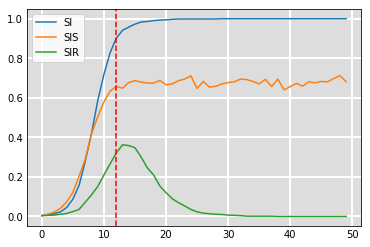

In [135]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(SI(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005), label='SI')
ax.plot(SIS(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005, mu=0.25), label='SIS')
ax.plot(SIR(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005, gamma=0.25), label='SIR')
plt.axvline(x=12, c='r', linestyle='--')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

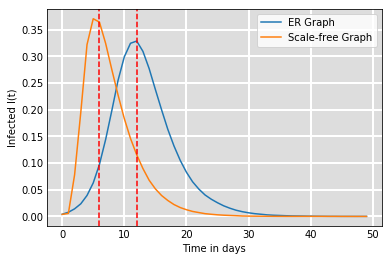

In [136]:
# Plot infection rate in random network versus scale-free network over time/days
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
plt.plot( np.mean([SIR(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='ER Graph' )
plt.plot( np.mean([SIR(sfg_graph, tmax=50, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Graph' )
plt.axvline(x=6, c='r', linestyle='--')
plt.axvline(x=12, c='r', linestyle='--')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Time in days')
ax.set_ylabel('Infected I(t)')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

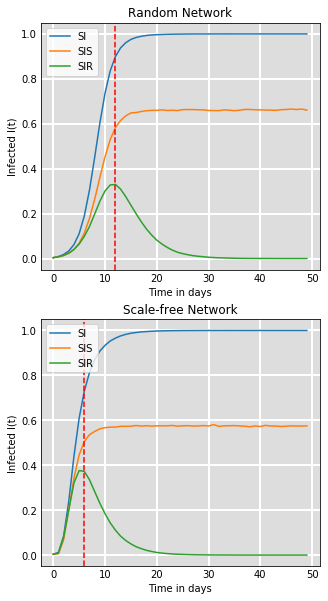

In [137]:
# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w', figsize=(5, 10))
ax1 = fig.add_subplot(211, facecolor='#dddddd', axisbelow=True)
ax1.plot( np.mean([SI(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005) for i in range(100)], axis=0), label='SI' )
ax1.plot( np.mean([SIS(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005, mu=0.25) for i in range(100)], axis=0), label='SIS' )
ax1.plot( np.mean([SIR(rnd_graph, tmax=50, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='SIR' )
plt.axvline(x=12, c='r', linestyle='--')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Infected I(t)')
ax1.set_title('Random Network')
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

ax2 = fig.add_subplot(212, facecolor='#dddddd', axisbelow=True)
ax2.plot( np.mean([SI(sfg_graph, tmax=50, beta=0.3, initial_inf=0.005) for i in range(100)], axis=0), label='SI' )
ax2.plot( np.mean([SIS(sfg_graph, tmax=50, beta=0.3, initial_inf=0.005, mu=0.25) for i in range(100)], axis=0), label='SIS' )
ax2.plot( np.mean([SIR(sfg_graph, tmax=50, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='SIR' )
plt.axvline(x=6, c='r', linestyle='--')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('Time in days')
ax2.set_ylabel('Infected I(t)')
ax2.set_title('Scale-free Network')
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

Text(0.45,0.95,'gamma = 0.4')

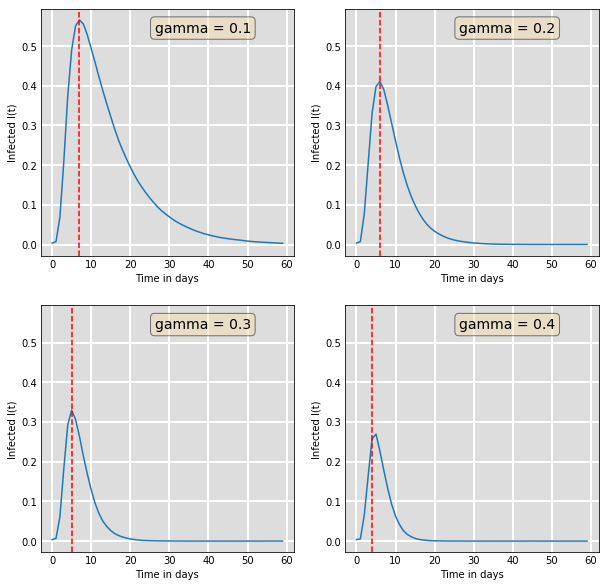

In [138]:
# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w', figsize=(10, 10))

ax1 = fig.add_subplot(221, facecolor='#dddddd', axisbelow=True)
ax1.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.1) for i in range(100)], axis=0))
plt.axvline(x=7, c='r', linestyle='--')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Infected I(t)')
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='gamma = 0.1'
ax1.text(0.45, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)



ax2 = fig.add_subplot(222, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax2.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.2) for i in range(100)], axis=0))
plt.axvline(x=6, c='r', linestyle='--')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('Time in days')
ax2.set_ylabel('Infected I(t)')
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='gamma = 0.2'
ax2.text(0.45, 0.95, textstr, transform=ax2.transAxes, fontsize=14, 
        verticalalignment='top', bbox=props)

ax3 = fig.add_subplot(223, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax3.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.3) for i in range(100)], axis=0))
plt.axvline(x=5, c='r', linestyle='--')
ax3.yaxis.set_tick_params(length=0)
ax3.xaxis.set_tick_params(length=0)
ax3.set_xlabel('Time in days')
ax3.set_ylabel('Infected I(t)')
ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='gamma = 0.3'
ax3.text(0.45, 0.95, textstr, transform=ax3.transAxes, fontsize=14, 
        verticalalignment='top', bbox=props)


ax4 = fig.add_subplot(224, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax4.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.4) for i in range(100)], axis=0))
plt.axvline(x=4, c='r', linestyle='--')
ax4.yaxis.set_tick_params(length=0)
ax4.xaxis.set_tick_params(length=0)
ax4.set_xlabel('Time in days')
ax4.set_ylabel('Infected I(t)')
ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='gamma = 0.4'
ax4.text(0.45, 0.95, textstr, transform=ax4.transAxes, fontsize=14, 
        verticalalignment='top', bbox=props)


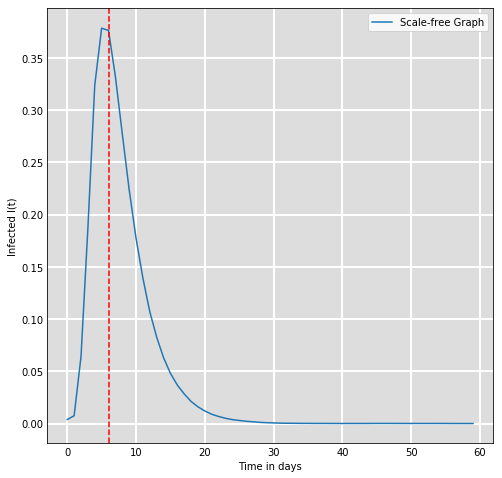

In [139]:
fig = plt.figure(facecolor='w', figsize=(8, 8))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Graph' )
plt.axvline(x=6, c='r', linestyle='--')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('Time in days')
ax.set_ylabel('Infected I(t)')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

Text(0.45,0.95,'Beta = 0.4')

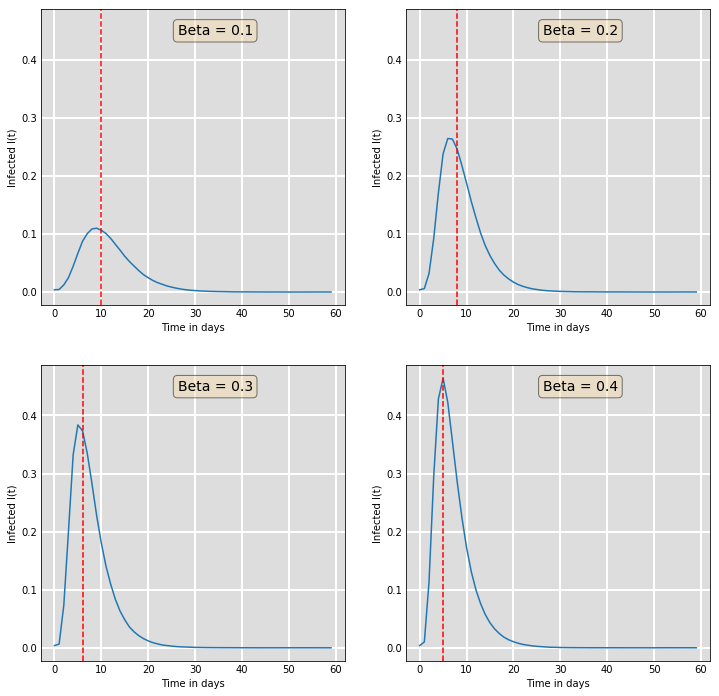

In [140]:
# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w', figsize=(12, 12))

ax1 = fig.add_subplot(221, facecolor='#dddddd', axisbelow=True)
ax1.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.1, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0))
plt.axvline(x=10, c='r', linestyle='--')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Infected I(t)')
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='Beta = 0.1'
ax1.text(0.45, 0.95, textstr, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


ax2 = fig.add_subplot(222, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax2.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.2, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0))
plt.axvline(x=8, c='r', linestyle='--')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('Time in days')
ax2.set_ylabel('Infected I(t)')
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='Beta = 0.2'
ax2.text(0.45, 0.95, textstr, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


ax3 = fig.add_subplot(223, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax3.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0))
plt.axvline(x=6, c='r', linestyle='--')
ax3.yaxis.set_tick_params(length=0)
ax3.xaxis.set_tick_params(length=0)
ax3.set_xlabel('Time in days')
ax3.set_ylabel('Infected I(t)')
ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='Beta = 0.3'
ax3.text(0.45, 0.95, textstr, transform=ax3.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


ax4 = fig.add_subplot(224, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax4.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.4, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0))
plt.axvline(x=5, c='r', linestyle='--')
ax4.yaxis.set_tick_params(length=0)
ax4.xaxis.set_tick_params(length=0)
ax4.set_xlabel('Time in days')
ax4.set_ylabel('Infected I(t)')
ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr='Beta = 0.4'
ax4.text(0.45, 0.95, textstr, transform=ax4.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


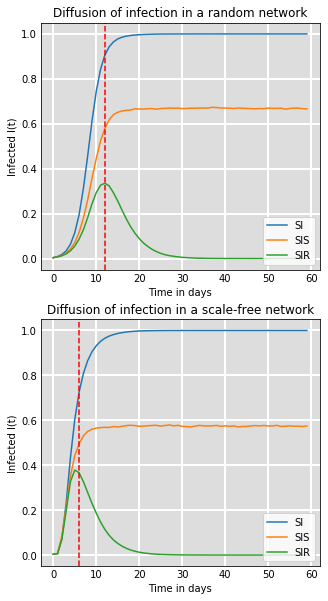

In [141]:
# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w', figsize=(5, 10) )
ax1 = fig.add_subplot(211, facecolor='#dddddd', axisbelow=True)

ax1.plot( np.mean([SI(rnd_graph, tmax=60, beta=0.3, initial_inf=0.005) for i in range(100)], axis=0), label='SI' )
ax1.plot( np.mean([SIS(rnd_graph, tmax=60, beta=0.3, initial_inf=0.005, mu=0.25) for i in range(100)], axis=0), label='SIS' )
ax1.plot( np.mean([SIR(rnd_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='SIR' )
plt.axvline(x=12, c='r', linestyle='--')
ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
ax1.set_title("Diffusion of infection in a random network")
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Infected I(t)')
plt.legend(loc="lower right")


ax2 = fig.add_subplot(212, facecolor='#dddddd', axisbelow=True)

ax2.plot( np.mean([SI(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005) for i in range(100)], axis=0), label='SI' )
ax2.plot( np.mean([SIS(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, mu=0.25) for i in range(100)], axis=0), label='SIS' )
ax2.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='SIR' )
plt.axvline(x=6, c='r', linestyle='--')
ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
ax2.set_title("Diffusion of infection in a scale-free network")
ax2.set_xlabel('Time in days')
ax2.set_ylabel('Infected I(t)')
plt.legend(loc="lower right")


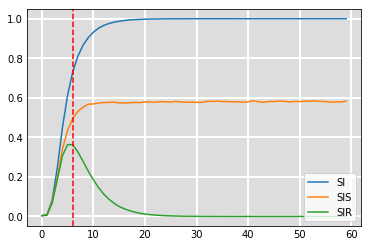

In [142]:
# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot( np.mean([SI(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005) for i in range(100)], axis=0), label='SI' )
ax.plot( np.mean([SIS(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, mu=0.25) for i in range(100)], axis=0), label='SIS' )
ax.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='SIR' )
plt.axvline(x=6, c='r', linestyle='--')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend(loc="lower right")

Name: 
Type: Graph
Number of nodes: 763
Number of edges: 1433
Average degree:   3.7562
Name: 
Type: Graph
Number of nodes: 758
Number of edges: 751
Average degree:   1.9815
Name: 
Type: Graph
Number of nodes: 753
Number of edges: 600
Average degree:   1.5936
Name: 
Type: Graph
Number of nodes: 748
Number of edges: 521
Average degree:   1.3930
Name: 
Type: Graph
Number of nodes: 743
Number of edges: 447
Average degree:   1.2032


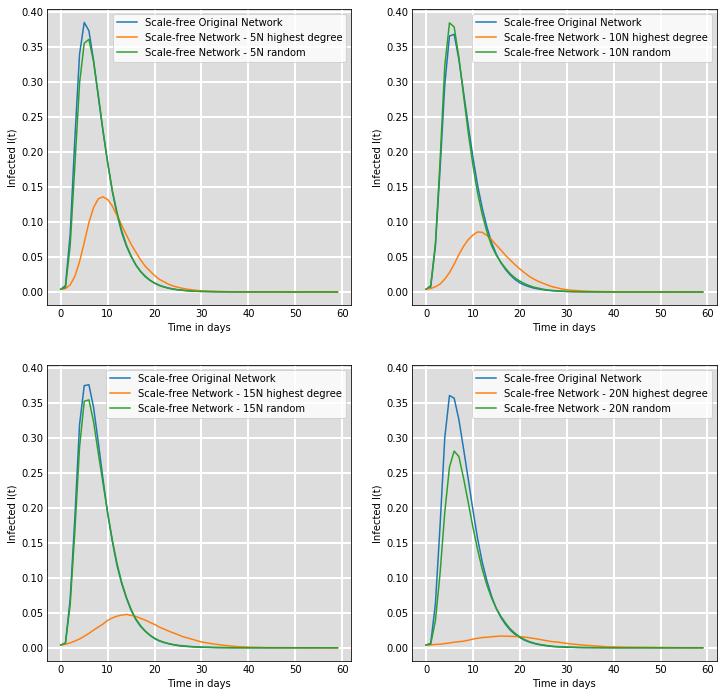

In [143]:
#print(sorted(d for n, d in sfg_graph.degree()))
#print(sorted((n, d) for n, d in sfg_graph.degree()))
sfg_5less = sfg_graph.copy()
sfg_10less = sfg_graph.copy()
sfg_15less = sfg_graph.copy()
sfg_20less = sfg_graph.copy()

sfg_5less_rnd = sfg_graph.copy()
sfg_10less_rnd = sfg_graph.copy()
sfg_15less_rnd = sfg_graph.copy()
sfg_20less_rnd = sfg_graph.copy()

rndList5 = np.random.randint(0,762, 5)
rndList10 = np.random.randint(0,762, 10)
rndList15 = np.random.randint(0,762, 15)
rndList20 = np.random.randint(0,762, 20)

sfg_5less.remove_nodes_from(list5)
sfg_10less.remove_nodes_from(list10)
sfg_15less.remove_nodes_from(list15)
sfg_20less.remove_nodes_from(list20)

sfg_5less_rnd.remove_nodes_from(rndList5)
sfg_10less_rnd.remove_nodes_from(rndList10)
sfg_15less_rnd.remove_nodes_from(rndList15)
sfg_20less_rnd.remove_nodes_from(rndList20)

print(nx.info(sfg_graph))
print(nx.info(sfg_5less))
print(nx.info(sfg_10less))
print(nx.info(sfg_15less))
print(nx.info(sfg_20less))

# Since it is a random process we want to do a couple
# sample runs to smooth out the curve

fig = plt.figure(facecolor='w', figsize=(12, 12))

ax1 = fig.add_subplot(221, facecolor='#dddddd', axisbelow=True)

ax1.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Original Network')
ax1.plot( np.mean([SIR(sfg_5less, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 5N highest degree')
ax1.plot( np.mean([SIR(sfg_5less_rnd, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 5N random')

ax1.yaxis.set_tick_params(length=0)
ax1.xaxis.set_tick_params(length=0)
ax1.set_xlabel('Time in days')
ax1.set_ylabel('Infected I(t)')
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

ax2 = fig.add_subplot(222, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax2.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Original Network')
ax2.plot( np.mean([SIR(sfg_10less, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 10N highest degree')
ax2.plot( np.mean([SIR(sfg_10less_rnd, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 10N random')

ax2.yaxis.set_tick_params(length=0)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('Time in days')
ax2.set_ylabel('Infected I(t)')
ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

ax3 = fig.add_subplot(223, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax3.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Original Network' )
ax3.plot( np.mean([SIR(sfg_15less, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 15N highest degree')
ax3.plot( np.mean([SIR(sfg_15less_rnd, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 15N random')

ax3.yaxis.set_tick_params(length=0)
ax3.xaxis.set_tick_params(length=0)
ax3.set_xlabel('Time in days')
ax3.set_ylabel('Infected I(t)')
ax3.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()

ax4 = fig.add_subplot(224, facecolor='#dddddd', sharex = ax1, sharey = ax1, axisbelow=True)
ax4.plot( np.mean([SIR(sfg_graph, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Original Network' )
ax4.plot( np.mean([SIR(sfg_20less, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 20N highest degree')
ax4.plot( np.mean([SIR(sfg_20less_rnd, tmax=60, beta=0.3, initial_inf=0.005, gamma=0.25) for i in range(100)], axis=0), label='Scale-free Network - 20N random')


ax4.yaxis.set_tick_params(length=0)
ax4.xaxis.set_tick_params(length=0)
ax4.set_xlabel('Time in days')
ax4.set_ylabel('Infected I(t)')
ax4.grid(b=True, which='major', c='w', lw=2, ls='-')
plt.legend()
